# Combinatorial Search Problems

The Knapsack problem is where the goal is to come up with a combination of items that will provide the best value, within a fixed capacity.

You will be given a list of items that make up the state space. Each subset of the inventory represents a state.

### Item Details

|Item|Weight|Value|
|:-|:-:|:-:|
|map|9|150|
|compass|13|35|
|water|153|200|
|sandwich|50|160|
|glucose|15|60|
|tin|68|45|
|banana|27|60|
|apple|39|40|
|cheese|23|30|
|beer|52|10|
|suntan cream|11|70|
|camera|32|30|
|T-shirt|24|15|
|trousers|48|10|
|umbrella|73|40|
|waterproof trousers|42|70|
|waterproof overclothes|43|75|
|note-case|22|80|
|sunglasses|7|20|
|towel|18|12|
|socks|4|50|
|book|30|10|

## Problem state

In [1]:
import numpy as np

class Knapsack():
    """
    Generate a random state of items and evaluate total value.
    """
    def __init__(self):
        """
        Initialize instance variables and data.
        """
        self.items = []
        self.maxCapacity = 0
        self.__init_data()
        
    def __len__(self):
        """
        Returns total number of items.
        """
        return len(self.items)
    
    def __init_data(self):
        """
        Initializes the item details in tuples.
        (item name, weight, value)
        """
        self.items = [
            ("map", 9, 150),
            ("compass", 13, 35),
            ("water", 153, 200),
            ("sandwich", 50, 160),
            ("glucose", 15, 60),
            ("tin", 68, 45),
            ("banana", 27, 60),
            ("apple", 39, 40),
            ("cheese", 23, 30),
            ("beer", 52, 10),
            ("suntan cream", 11, 70),
            ("camera", 32, 30),
            ("t-shirt", 24, 15),
            ("trousers", 48, 10),
            ("umbrella", 73, 40),
            ("waterproof trousers", 42, 70),
            ("waterproof overclothes", 43, 75),
            ("note-case", 22, 80),
            ("sunglasses", 7, 20),
            ("towel", 18, 12),
            ("socks", 4, 50),
            ("book", 30, 10)
        ]
        
        self.maxCapacity = 400
        
    def getValue(self, zeroOneList):
        """
        Obtain value of state, while ignoring items that will 
        cause acculumated weight to exceed maximum weight.
        """        
        totalWeight = totalValue = 0
        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                totalWeight += zeroOneList[i] * weight
                totalValue += zeroOneList[i] * value       
        return totalValue
        
    def printItems(self, zeroOneList):
        """
        Print out selected items.
        """        
        totalWeight = totalValue = 0
        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                if zeroOneList[i] > 0:
                    totalWeight += weight
                    totalValue += value
                    print("- Adding {}: weight = {}, value = {}, accumulated weight = {}, accumulated value = {}".format(item, weight, value, totalWeight, totalValue))
            print("- Total weight = {}, Total value = {}".format(totalWeight, totalValue))
        
def main():
    """
    Produce a random solution with evaluation.
    """
    knapsack = Knapsack()  
    randomSolution = np.random.randint(2, size=len(knapsack))
    print("Random solution =", randomSolution)
    knapsack.printItems(randomSolution)

In [2]:
main()

Random solution = [1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1]
- Adding map: weight = 9, value = 150, accumulated weight = 9, accumulated value = 150
- Total weight = 9, Total value = 150
- Total weight = 9, Total value = 150
- Adding water: weight = 153, value = 200, accumulated weight = 162, accumulated value = 350
- Total weight = 162, Total value = 350
- Adding sandwich: weight = 50, value = 160, accumulated weight = 212, accumulated value = 510
- Total weight = 212, Total value = 510
- Total weight = 212, Total value = 510
- Adding tin: weight = 68, value = 45, accumulated weight = 280, accumulated value = 555
- Total weight = 280, Total value = 555
- Total weight = 280, Total value = 555
- Total weight = 280, Total value = 555
- Adding cheese: weight = 23, value = 30, accumulated weight = 303, accumulated value = 585
- Total weight = 303, Total value = 585
- Total weight = 303, Total value = 585
- Adding suntan cream: weight = 11, value = 70, accumulated weight = 314, accumulate

## Genetic Algorithm

In [3]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import matplotlib.pyplot as plt
import seaborn as sns

toolbox = base.Toolbox()
knapsack = Knapsack()

# Initialize constants
POPULATION_SIZE = 50
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 1

random.seed(42)

### 1. Choose chromosome type

We will choose a binary representation of our chromosome which has values of 0 or 1 indicating whether the particular item was chosen or not in our chromosome state.

In [4]:
toolbox.register(
    alias="zeroOrOne",
    function=random.randint,
    a=0,
    b=1
)

### 2. Initialize fitness function

Since the goal is to maximize the total Value of the state, we will choose a maximizing fitness strategy.

In [5]:
creator.create(
    name="FitnessMax",
    base=base.Fitness,
    weights=(1.0,)
)

### 3. Initialize population function

In [6]:
# Creates a container to store individuals of the generation
creator.create(
    name="Individual",
    base=list,
    fitness=creator.FitnessMax
)

# Creates a individual generator that saves in the list called Individual
toolbox.register(
    alias="individualCreator",
    function=tools.initRepeat,
    container=creator.Individual,
    func=toolbox.zeroOrOne,
    n=len(knapsack)
)

# Creates a population generator that saves in a list
toolbox.register(
    alias="populationCreator",
    function=tools.initRepeat,
    container=list,
    func=toolbox.individualCreator
)

### 4. Initialize evaluation function

In [7]:
def knapsackValue(individual):
    return knapsack.getValue(individual), # return a tuple

toolbox.register("evaluate", knapsackValue)

### 5. Initialize operator functions

In [8]:
# Selection
toolbox.register(
    alias="select",
    function=tools.selTournament,
    tournsize=3
)

# Crossover
toolbox.register(
    alias="mate",
    function=tools.cxTwoPoint
)

# Mutation
toolbox.register(
    alias="mutate",
    function=tools.mutFlipBit,
    indpb=(1.0/len(knapsack))
)

### 6. Integrate everything

gen	nevals	max	avg   
0  	50    	805	595.86
1  	50    	860	704.66
2  	48    	867	750.42
3  	46    	905	793.74
4  	48    	945	826.8 
5  	46    	955	858.18
6  	42    	1000	897.02
7  	44    	1002	916   
8  	46    	1030	952.2 
9  	45    	1030	974.14
10 	50    	1030	985.88
11 	48    	1030	998.9 
12 	45    	1030	1003.7
13 	47    	1030	1023.3
14 	45    	1030	1018.9
15 	46    	1030	1021.6
16 	47    	1030	1022.1
17 	48    	1030	1026.7
18 	46    	1030	1020  
19 	43    	1030	1018.34
20 	46    	1030	1024.9 
21 	46    	1030	1016.9 
22 	45    	1030	1022.8 
23 	46    	1030	1027.7 
24 	44    	1030	1021.1 
25 	49    	1030	1025.7 
26 	44    	1030	1015.6 
27 	42    	1030	1017.1 
28 	44    	1030	1017.1 
29 	43    	1030	1023.24
30 	50    	1030	1025.6 
31 	46    	1030	1025.5 
32 	48    	1030	1027.5 
33 	46    	1030	1030   
34 	47    	1030	1018.74
35 	47    	1030	1023.2 
36 	36    	1030	1024.1 
37 	48    	1030	1016.1 
38 	45    	1030	1022.6 
39 	42    	1030	1018.7 
40 	47    	1030	1022.94
41 	46    	1030	102

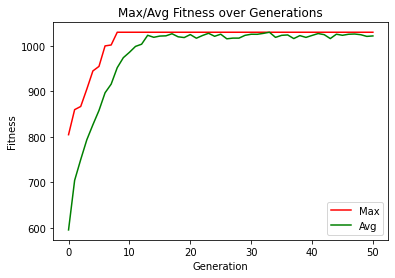

In [9]:
def main():
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register(name="max", function=np.max)
    stats.register(name="avg", function=np.mean)
    
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
    
    population, logbook = algorithms.eaSimple(
        population=population,
        toolbox=toolbox,
        cxpb=P_CROSSOVER,
        mutpb=P_MUTATION,
        ngen=MAX_GENERATIONS,
        stats=stats,
        halloffame=hof,
        verbose=True        
    )
    
    best = hof.items[0]
    print("-- Best ever Individual =", best)
    print("-- Best ever Fitness =",  best.fitness.values[0])
    
    print("-- Knapsack items =")
    knapsack.printItems(best)
    
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")
    
    plt.plot(maxFitnessValues, color='red', label='Max')
    plt.plot(meanFitnessValues, color='green', label='Avg')
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Max/Avg Fitness over Generations")
    plt.legend()
    plt.show()
    
main()   